In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
# Load the CSV file
df = pd.read_csv('project.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.sample(5)

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,duration,total_bytes,receiving_bytes,sending_bytes,packets_rate,packets_len_rate,min_packets_len,max_packets_len,mean_packets_len,standard_deviation_packets_len,variance_packets_len,coefficient_of_variation_packets_len,dns_domain_name,dns_top_level_domain,dns_second_level_domain,dns_domain_name_length,dns_subdomain_name_length,uni_gram_domain_name,bi_gram_domain_name,tri_gram_domain_name,numerical_percentage,character_distribution,character_entropy,max_continuous_numeric_len,max_continuous_alphabet_len,max_continuous_consonants_len,max_continuous_same_alphabet_len,vowels_consonant_ratio,conv_freq_vowels_consonants,distinct_ttl_values,ttl_values_min,ttl_values_max,ttl_values_mean,ttl_values_mode,ttl_values_median,distinct_A_records,ans_resource_record_type,ans_resource_record_class,label
1002233,2016-04-25 15:32:15.352055_172.31.1.6_22511_17...,2016-04-25 15:32:15.352055,172.31.1.6,22511,172.31.3.121,53,0.08302,486,405,81,24.09004,5853.87858,81,405,243.0,162.0,26244.00,0.66667,82616bca.webengage.co.,co,webengage.co,22,8,"['8', '2', '6', '1', '6', 'b', 'c', 'a', '.', ...","['82', '26', '61', '16', '6b', 'bc', 'ca', 'a....","['826', '261', '616', '16b', '6bc', 'bca', 'ca...",0.227273,"{'w': 1, 'g': 2, 'b': 2, 'a': 2, 'o': 1, 'c': ...",3.572624,5,9,2,1,0.750000,0.550000,2,27,20986,7013.33333,27.0,27.0,2,"[5, 1, 1]","[1, 1, 1]",Benign
239481,2019-04-29 08:34:24.520588_198.41.0.130_50062_...,2019-04-29 08:34:24.520588,198.41.0.130,50062,198.41.0.10,53,0.00577,503,394,109,346.55077,87157.51929,109,394,251.5,142.5,20306.25,0.56660,0b3901fdf7f449cd983cbf485b5315efc6.dnscat-txt....,com,dnscat-txt.com,50,34,"['0', 'b', '3', '9', '0', '1', 'f', 'd', 'f', ...","['0b', 'b3', '39', '90', '01', '1f', 'fd', 'df...","['0b3', 'b39', '390', '901', '01f', '1fd', 'fd...",0.400000,"{'b': 3, 'd': 3, '6': 1, 't': 3, 'n': 1, '3': ...",4.298689,4,6,4,1,0.130435,0.100000,1,60,60,60.00000,60.0,60.0,0,[16],[1],Malicious
531750,2023-09-04 09:40:24.008368_113.54.129.232_6421...,2023-09-04 09:40:24.008368,113.54.129.232,64214,114.114.114.114,53,0.33666,442,339,103,5.94075,1312.90508,103,339,221.0,118.0,13924.00,0.53394,ba8Lb8C4mPcJbPOo51vuoSoU3hQW2.www.ggy666.tk.,tk,ggy666.tk,44,29,"['b', 'a', '8', 'L', 'b', '8', 'C', '4', 'm', ...","['ba', 'a8', '8L', 'Lb', 'b8', '8C', 'C4', '4m...","['ba8', 'a8L', '8Lb', 'Lb8', 'b8C', '8C4', 'C4...",0.227273,"{'m': 1, 'u': 1, 'h': 1, 'J': 1, '6': 3, '3': ...",4.708987,3,8,3,3,0.333333,0.045455,1,30,30,30.00000,30.0,30.0,0,[5],[1],Malicious
942746,2016-04-25 12:17:03.277026_172.31.1.6_36065_17...,2016-04-25 12:17:03.277026,172.31.1.6,36065,172.31.3.121,53,1.99330,378,309,69,1.00336,189.63555,69,309,189.0,120.0,14400.00,0.63492,icydk.com.,com,icydk.com,10,0,"['i', 'c', 'y', 'd', 'k', '.', 'c', 'o', 'm', ...","['ic', 'cy', 'yd', 'dk', 'k.', '.c', 'co', 'om...","['icy', 'cyd', 'ydk', 'dk.', 'k.c', '.co', 'co...",0.000000,"{'.': 2, 'c': 2, 'k': 1, 'd': 1, 'i': 1, 'y': ...",2.921928,0,5,4,1,0.333333,0.300000,1,11584,11584,11584.00000,11584.0,11584.0,1,[1],[1],Benign
429241,2019-06-05 08:35:22.149853_198.41.0.136_63826_...,2019-06-05 08:35:22.149853,198.41.0.136,63826,198.41.0.10,53,0.00268,384,217,167,747.64777,143548.37219,167,217,192.0,25.0,625.00,0.13021,post.1d5438a601d8aeb1d367bac76ebd0dccf79e7cb31...,com,cobaltstrike-aaaa.com,108,4,"['p', 'o', 's', 't', '.', '1', 'd', '5', '4', ...","['po', 'os', 'st', 't.', '.1', '1d', 'd5', '54...","['pos', 'ost', 'st.', 't.1', '.1d', '1d5', 'd5...",0.388889,"{'c': 8, '9': 9, 'r': 1, 'n': 1, 'h': 1, 'm': ...",4.406167,7,12,5,4,0.487179,0.149533,1,1,1,1.00000,1.0,1.0,1,[1],[1],Malicious


In [9]:
df.shape

(1451713, 45)

In [5]:
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns  # Should be empty in your case

# Create a DataFrame for display
feature_counts = pd.DataFrame({
    "Feature Type": ["Numerical", "Categorical"],
    "Count": [len(numerical_features), len(categorical_features)]
})

# Display as table
print(feature_counts)

  Feature Type  Count
0    Numerical     31
1  Categorical     14


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'label' column
df['label'] = label_encoder.fit_transform(df['label'])

# Check the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", mapping)

# Example Output:
# Label Mapping: {'Benign': 0, 'Malicious': 1}


Label Mapping: {'Benign': 0, 'Malicious': 1}


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Summary of basic cleaning checks
cleaning_report = pd.DataFrame({
    "Check": ["Total Missing Values", "Columns with Missing Values", "Total Duplicate Rows"],
    "Count": [total_missing, (missing_values > 0).sum(), duplicate_rows]
})

# Display summary table
print(cleaning_report)

# Display columns with missing values (if any)
if total_missing > 0:
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])

                         Check  Count
0         Total Missing Values      0
1  Columns with Missing Values      0
2         Total Duplicate Rows      0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

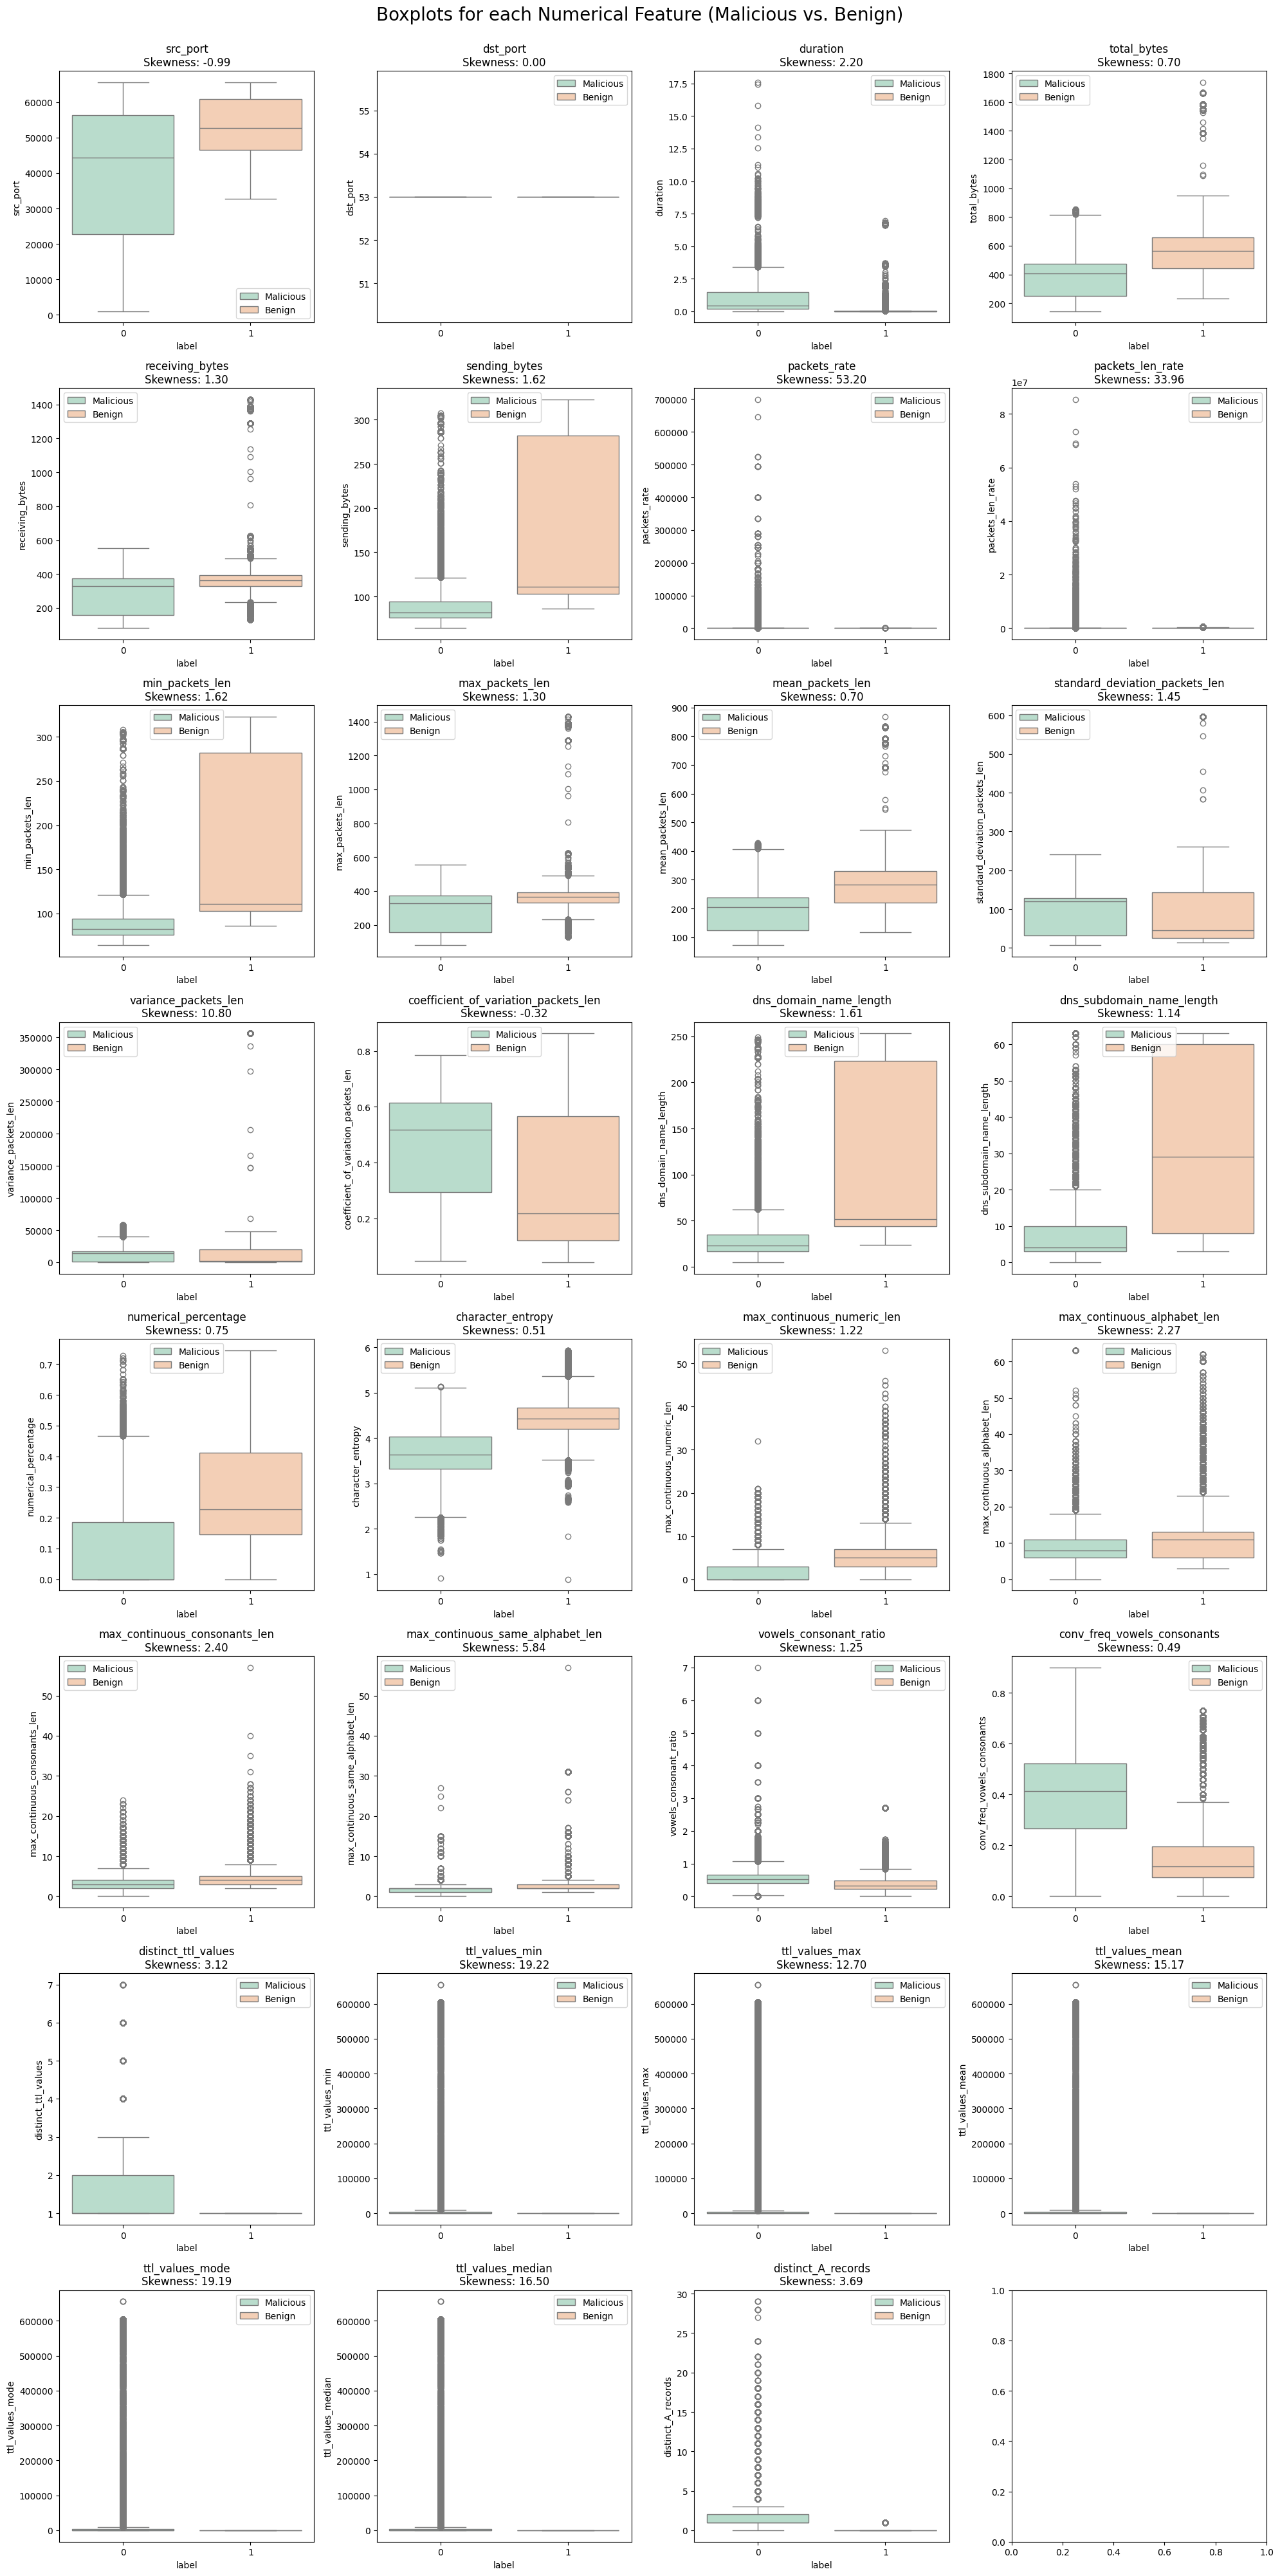

In [15]:
#checking for Outliers
target_column = 'label'  


num_features = len(numerical_features)
rows = (num_features + 3) // 4 


fig, axs = plt.subplots(rows, 4, figsize=(20, 5 * rows))  
fig.suptitle('Boxplots for each Numerical Feature (Malicious vs. Benign)', y=1, size=20)
pastel_palette = sns.color_palette('Pastel2')
attack_palette = {0: pastel_palette[0], 1: pastel_palette[1]}  

# Iterate through the numerical features and create box plots
for i, feature in enumerate(numerical_features):
    if i < num_features:  # Check if the subplot limit is reached
        ax = axs[i // 4, i % 4]  # Adjust for subplot layout (4 columns per row)
        sns.boxplot(data=df, x=target_column, y=feature, hue=target_column, orient='v', ax=ax, palette=attack_palette)
        
        # Title with skewness value
        skewness = df[feature].skew()
        ax.set_title(f'{feature}\nSkewness: {skewness:.2f}')
        
        # Customize the legend
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles, ["Malicious", "Benign"])

# Adjust layout for better visualization
plt.tight_layout()
plt.show()



In [17]:
import numpy as np
import pandas as pd

# Split data into malicious and benign data
malicious_data = df[df['label'] == 1]
benign_data = df[df['label'] == 0]

# Remove outliers from both malicious and benign data using IQR
columns = ['duration','total_bytes','receiving_bytes','max_packets_len','mean_packets_len',
           'character_entropy','max_continuous_numeric_len','max_continuous_alphabet_len',
           'max_continuous_consonants_len','max_continuous_same_alphabet_len','vowels_consonant_ratio',
           'conv_freq_vowels_consonants']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers from both malicious and benign data
    malicious_data = malicious_data[(malicious_data[col] >= lower_bound) & (malicious_data[col] <= upper_bound)]
    benign_data = benign_data[(benign_data[col] >= lower_bound) & (benign_data[col] <= upper_bound)]

# Combine the cleaned malicious and benign data
df_cleaned = pd.concat([malicious_data, benign_data])


In [18]:
df_cleaned.shape

(1069683, 45)

In [43]:
df_cleaned.sample(1)

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,duration,total_bytes,receiving_bytes,sending_bytes,packets_rate,packets_len_rate,min_packets_len,max_packets_len,mean_packets_len,standard_deviation_packets_len,variance_packets_len,coefficient_of_variation_packets_len,dns_domain_name,dns_top_level_domain,dns_second_level_domain,dns_domain_name_length,dns_subdomain_name_length,uni_gram_domain_name,bi_gram_domain_name,tri_gram_domain_name,numerical_percentage,character_distribution,character_entropy,max_continuous_numeric_len,max_continuous_alphabet_len,max_continuous_consonants_len,max_continuous_same_alphabet_len,vowels_consonant_ratio,conv_freq_vowels_consonants,distinct_ttl_values,ttl_values_min,ttl_values_max,ttl_values_mean,ttl_values_mode,ttl_values_median,distinct_A_records,ans_resource_record_type,ans_resource_record_class,label,dns_tld_encoded
635213,2016-04-27 11:53:53.690363_172.31.1.6_4183_172...,2016-04-27 11:53:53.690363,172.31.1.6,4183,172.31.3.121,53,0.10788,593,471,122,18.53963,5497.0004,122,471,296.5,174.5,30450.25,0.58853,a7820326c32154d01d8b1da2fac38de71.profile.dfw5...,net,cloudfront.net,63,33,"['a', '7', '8', '2', '0', '3', '2', '6', 'c', ...","['a7', '78', '82', '20', '03', '32', '26', '6c...","['a78', '782', '820', '203', '032', '326', '26...",0.365079,"{'i': 1, 'e': 3, 'u': 1, 'n': 2, 't': 2, '2': ...",4.447064,7,10,3,1,0.458333,0.258065,1,59,59,59.0,59.0,59.0,8,"[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",0,288


In [23]:
df_cleaned.to_csv('cleaned_train_data.csv',index=False)